# Neural Networks
This notebook runs multiple different neural networks.

<br><br><br><br>
# Libaries & Global variables

## Libaries

In [2]:
# Import all the libaris in the module dependencies
from dependencies import *

## Global variables

In [3]:
dataset_path = os.path.join(os.getcwd(), 'datasets', 'UTKface_cropped-new-structure-balanced')

In [4]:
training_path   = os.path.join(os.getcwd(), 'datasets', 'UTKface_cropped-new-structure-balanced', 'training')
validation_path = os.path.join(os.getcwd(), 'datasets', 'UTKface_cropped-new-structure-balanced', 'validation')
test_path       = os.path.join(os.getcwd(), 'datasets', 'UTKface_cropped-new-structure-balanced', 'test')

<br><br><br><br>
# General functions

In [8]:
# Import some general functions created by myself (loading the data, visualizing conv layers, etc.)
from general_functions import *

In [9]:
df = load_dataset('df-UTKface_cropped-balanced.pkl')
df.head()

,age,age-binned,gender,race,datetime,category,path
0,10,"(0, 10]",0,0,20161220222308131,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_cropped-new-structure-balanced\training\10
1,10,"(0, 10]",0,0,20170103200329407,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_cropped-new-structure-balanced\training\10
2,10,"(0, 10]",0,0,20170103200522151,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_cropped-new-structure-balanced\training\10
3,10,"(0, 10]",0,0,20170103233459275,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_cropped-new-structure-balanced\training\10
4,10,"(0, 10]",0,0,20170104013211746,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface_cropped-new-structure-balanced\training\10


In [10]:
df['age-binned'].value_counts()

(60, 70]    1170
(50, 60]    1170
(40, 50]    1170
(30, 40]    1170
(20, 30]    1170
(10, 20]    1170
(0, 10]     1170
Name: age-binned, dtype: int64

<br><br><br><br><br><br><br><br>
# Neural Network 1.0 - LeNet-5 CNN Architecture
* Sithungu, S., & Van der Haar, D. (2019). Real-Time Age Detection Using a Convolutional Neural Network. *Business Information Systems*, 245–256. https://doi.org/10.1007/978-3-030-20482-2_20
* Information of LeNet-5 CNN architecture https://engmrk.com/lenet-5-a-classic-cnn-architecture/


<br>

The LeNet-5 structure consists of:
* Layer 1 - Input: 32x32 grayscale image with 6 feature maps of size 5x5 and stride 1.
* Layer 2 - Average pooling with filter size 2x2 and stride 2.
* Layer 3 - Conv layer with 16 feature maps of size 5x5 and stride 1.
* Layer 4 - Average pooling with filter size 2x2 and stride 2.
* Layer 5 - Fully connected layer with 120 units/feature maps of size 1x1.
* Layer 6 - Fully connected layer with 84 units.

<br>

Result:
* Loss went to nan pretty early.

<br><br>
## Functions

In [11]:
def build_dense_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (3,3), 
                            activation  = 'relu', 
                            input_shape = (32, 32, 1)))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))    
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dense(units = 84, 
                           activation='relu'))
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_dense_model()
model.name='neural-network-1.0-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.0-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_2 (Dense)        

<br><br>
## Generator

In [12]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (32, 32)
COLOR_MODE  = 'grayscale'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE,
                                                      shuffle      = False)

Found 6177 images belonging to 7 classes.
Found 1629 images belonging to 7 classes.
Found 384 images belonging to 7 classes.


<br><br><br>
## Run the model

In [13]:
K.clear_session()

model = build_dense_model()
model.name='neural-network-1.0-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.0-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_2 (Dense)        

In [22]:
filepath = "models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count()),
                              callbacks           = callbacks_list
                             )

Epoch 1/15
193/193 [==============================] - 8s 40ms/step - loss: 1.6553 - accuracy: 0.3281 - val_loss: 1.6418 - val_accuracy: 0.4144

Epoch 00001: val_accuracy improved from -inf to 0.41438, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights-0.41.h5
Epoch 2/15
193/193 [==============================] - 8s 41ms/step - loss: 1.3788 - accuracy: 0.4566 - val_loss: 1.4374 - val_accuracy: 0.4640

Epoch 00002: val_accuracy improved from 0.41438 to 0.46399, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights-0.46.h5
Epoch 3/15
193/193 [==============================] - 8s 39ms/step - loss: 1.2887 - accuracy: 0.4854 - val_loss: 1.4694 - val_accuracy: 0.4897

Epoch 00003: val_accuracy improved from 0.46399 to 0.48967, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights-0.49.h5
Epoch 4/15
193/193 [==============================] - 7s 38ms/step - loss: 1.2058 

<br><br><br>
## Save results and plot results

In [23]:
# Save results
# model.save_weights('models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights.h5')
model.save('models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-1.0-lenet-5-history', 
                   storage_location = 'models-and-results-UTKface_cropped-balanced')

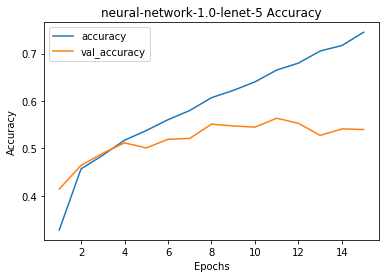

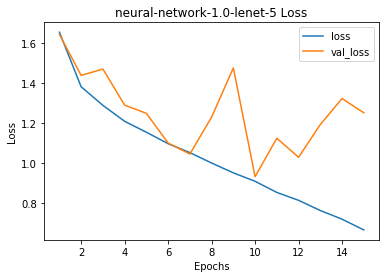

In [24]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-1.0-lenet-5 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-1.0-lenet-5 Loss')

Predictions: [[1. 0. 0. 0. 0. 0. 0.]].
conv2d_2_3 (1, 27, 27, 16) 


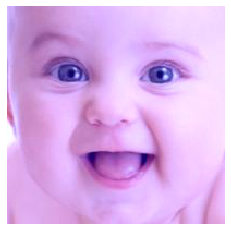

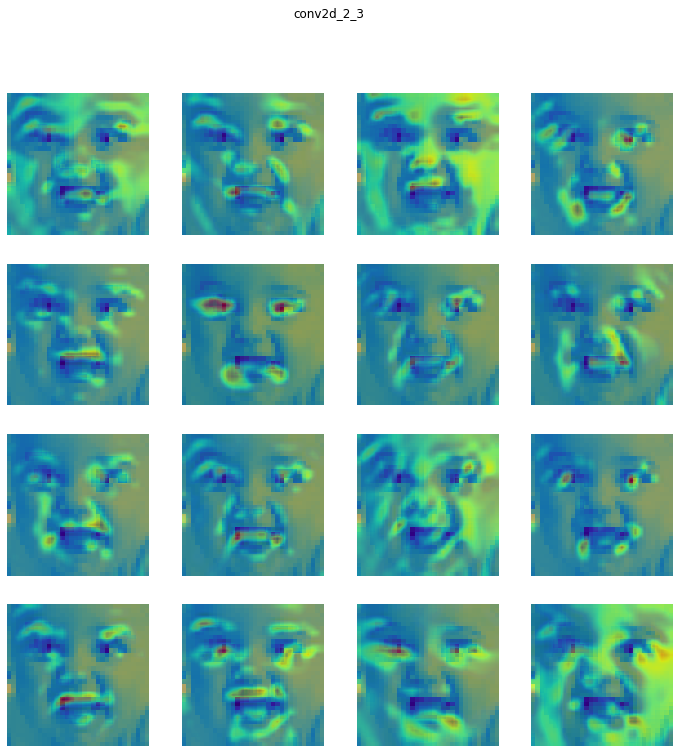

In [16]:
# Plot image activation
best_val_score = 'models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-weights-0.56.h5'
model_path     = 'models-and-results-UTKface_cropped-balanced/neural-network-1.0-lenet-5-model.h5'

plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg')

plot_layers(model_path         = model_path,
            best_val_score     = best_val_score,
            img_path           = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg',
            target_size_img    = (32, 32),
            color_mode_img     = 'grayscale')

Predictions: [[0. 0. 1. 0. 0. 0. 0.]].


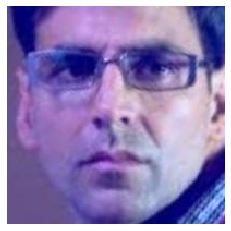

In [8]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\40\31_0_3_20170104230610969.jpg.chip.jpg')

Predictions: [[0. 0. 0. 0. 1. 0. 0.]].


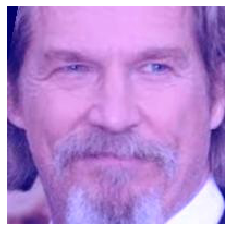

In [31]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\70\65_0_0_20170120222348112.jpg.chip.jpg')

Mean class accuracies:

Class 1-10 has an accuracy of 0.86.
Class 11-20 has an accuracy of 0.71.
Class 21-30 has an accuracy of 0.55.
Class 31-40 has an accuracy of 0.28.
Class 41-50 has an accuracy of 0.63.
Class 51-60 has an accuracy of 0.22.
Class 61-70 has an accuracy of 0.53.


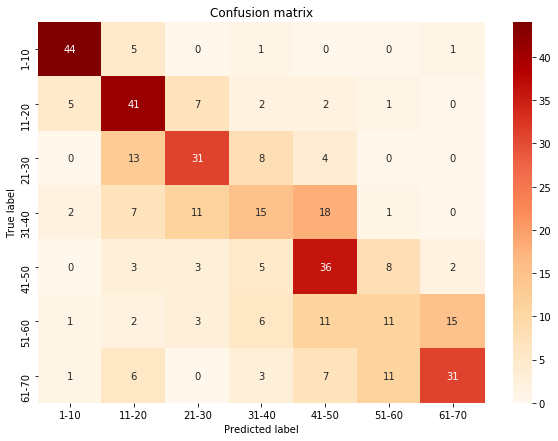

In [14]:
plot_confusion_matrix(model_path, best_val_score, test_generator)

<br><br><br><br><br><br><br><br>
# Neural Network 1.1 - LeNet-5 CNN Architecture - BatchNormalization/Softmax
Modified the original LeNet-5 structure by:
* 1. Adding **two** BatchNormalization() layers **after** the Conv2D layers. 
* 2. Adding changing the output layers to an activation **softmax** instead of the **assumed** relu.

<br><br>
## Functions

In [33]:
def build_dense_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (3,3), 
                            activation  = 'relu', 
                            input_shape = (32, 32, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))    
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dense(units = 84, 
                           activation='relu'))
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_dense_model()
model.name='neural-network-1.1-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.1-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 6)         24        
_________________________________________________________________
average_pooling2d_3 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
average_pooling2d_4 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)    

<br><br>
## Generator

In [15]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (32, 32)
COLOR_MODE  = 'grayscale'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE,
                                                      shuffle      = False)

Found 6177 images belonging to 7 classes.
Found 1629 images belonging to 7 classes.
Found 384 images belonging to 7 classes.


<br><br><br>
## Run the model

In [35]:
K.clear_session()

model = build_dense_model()
model.name='neural-network-1.1-LeNet-5-CNN-Architecture'
model.summary()

Model: "neural-network-1.1-LeNet-5-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 6)         24        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 16)        64        
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)    

In [36]:
filepath = "models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count()),
                              callbacks           = callbacks_list
                             )

Epoch 1/15
193/193 [==============================] - 12s 60ms/step - loss: 1.6501 - accuracy: 0.3998 - val_loss: 1.9495 - val_accuracy: 0.2113

Epoch 00001: val_accuracy improved from -inf to 0.21125, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights-0.21.h5
Epoch 2/15
193/193 [==============================] - 12s 61ms/step - loss: 1.1857 - accuracy: 0.5269 - val_loss: 1.9591 - val_accuracy: 0.2273

Epoch 00002: val_accuracy improved from 0.21125 to 0.22730, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights-0.23.h5
Epoch 3/15
193/193 [==============================] - 12s 60ms/step - loss: 0.9876 - accuracy: 0.6037 - val_loss: 1.2417 - val_accuracy: 0.4822

Epoch 00003: val_accuracy improved from 0.22730 to 0.48215, saving model to models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights-0.48.h5
Epoch 4/15
193/193 [==============================] - 12s 61ms/step - loss: 0.8

<br><br><br>
## Save results and plot results

In [37]:
# Save results
# model.save_weights('models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights.h5')
model.save('models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-1.1-lenet-5-history', 
                   storage_location = 'models-and-results-UTKface_cropped-balanced')

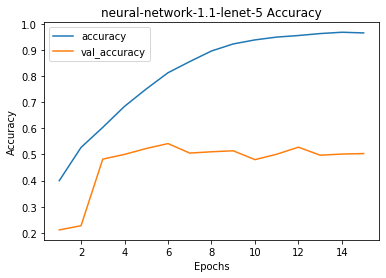

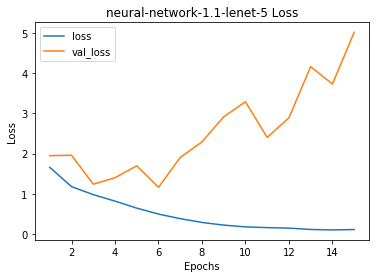

In [38]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-1.1-lenet-5 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-1.1-lenet-5 Loss')

Predictions: [[0. 1. 0. 0. 0. 0. 0.]].
conv2d_2_5 (1, 27, 27, 16) 


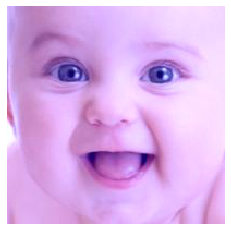

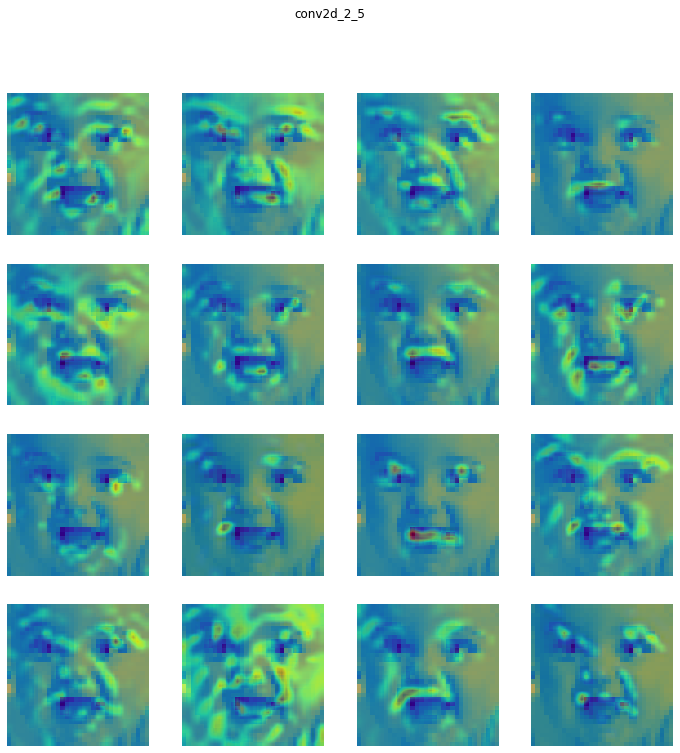

In [17]:
# Plot image activation
best_val_score = 'models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-weights-0.54.h5'
model_path     = 'models-and-results-UTKface_cropped-balanced/neural-network-1.1-lenet-5-model.h5'

plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg')

plot_layers(model_path         = model_path,
            best_val_score     = best_val_score,
            img_path           = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg',
            target_size_img    = (32, 32),
            color_mode_img     = 'grayscale')

Predictions: [[0. 1. 0. 0. 0. 0. 0.]].


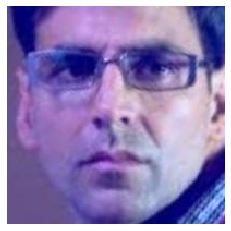

In [41]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\40\31_0_3_20170104230610969.jpg.chip.jpg')

Predictions: [[0. 1. 0. 0. 0. 0. 0.]].


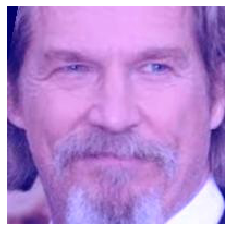

In [42]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\70\65_0_0_20170120222348112.jpg.chip.jpg')

Mean class accuracies:

Class 1-10 has an accuracy of 0.84.
Class 11-20 has an accuracy of 0.53.
Class 21-30 has an accuracy of 0.5.
Class 31-40 has an accuracy of 0.5.
Class 41-50 has an accuracy of 0.21.
Class 51-60 has an accuracy of 0.43.
Class 61-70 has an accuracy of 0.51.


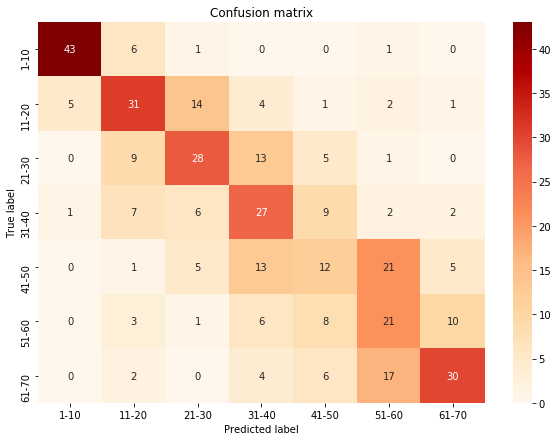

In [16]:
plot_confusion_matrix(model_path, best_val_score, test_generator)

------

<br><br><br><br>
# Neural Network 2.0 - LeNet-5 CNN (proposed improved version)

<br><br>
## Functions

In [14]:
def build_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (7, 7),        # Fiters from (3, 3) to (7, 7)
                            activation  = 'relu', 
                            input_shape = (200, 200, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dropout(rate = 0.5))                # Dropout layer added
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))        # Softmax instead of relu
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

<br><br>
## Generator

In [17]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (200, 200)
COLOR_MODE  = 'rgb'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE,
                                                      shuffle      = False)

Found 6177 images belonging to 7 classes.
Found 1629 images belonging to 7 classes.
Found 384 images belonging to 7 classes.


<br><br><br>
## Run the model

In [45]:
K.clear_session()

model = build_model()
model.name='neural-network-2.0-LeNet-5-proposed-improved-CNN-Architecture'
model.summary()


Model: "neural-network-2.0-LeNet-5-proposed-improved-CNN-Architecture"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 6)       888       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 35344)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4241400   
_________________________________________________________________
drop

In [46]:
filepath = "models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count()),
                              callbacks           = callbacks_list
                             )

Epoch 1/15
193/193 [==============================] - 118s 609ms/step - loss: 1.7013 - accuracy: 0.3230 - val_loss: 1.5559 - val_accuracy: 0.4531

Epoch 00001: val_accuracy improved from -inf to 0.45312, saving model to models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights-0.45.h5
Epoch 2/15
193/193 [==============================] - 113s 585ms/step - loss: 1.4415 - accuracy: 0.4456 - val_loss: 1.2268 - val_accuracy: 0.4753

Epoch 00002: val_accuracy improved from 0.45312 to 0.47527, saving model to models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights-0.48.h5
Epoch 3/15
193/193 [==============================] - 114s 590ms/step - loss: 1.2950 - accuracy: 0.5012 - val_loss: 1.2772 - val_accuracy: 0.5028

Epoch 00003: val_accuracy improved from 0.47527 to 0.50282, saving model to models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights-0.50.h5
Epoch 4/15
193/193 [========

<br><br><br>
## Save results and plot results

In [47]:
# Save results
# model.save_weights('models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights.h5')
model.save('models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-2.0-lenet-5-proposed-model-history', 
                   storage_location = 'models-and-results-UTKface_cropped-balanced')

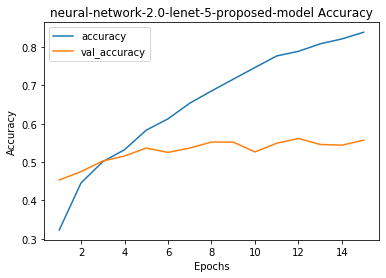

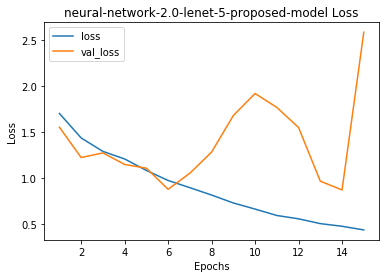

In [48]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-2.0-lenet-5-proposed-model Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-2.0-lenet-5-proposed-model Loss')

Predictions: [[1. 0. 0. 0. 0. 0. 0.]].
conv2d_2_9 (1, 95, 95, 16) 


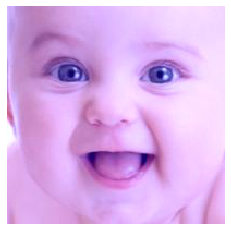

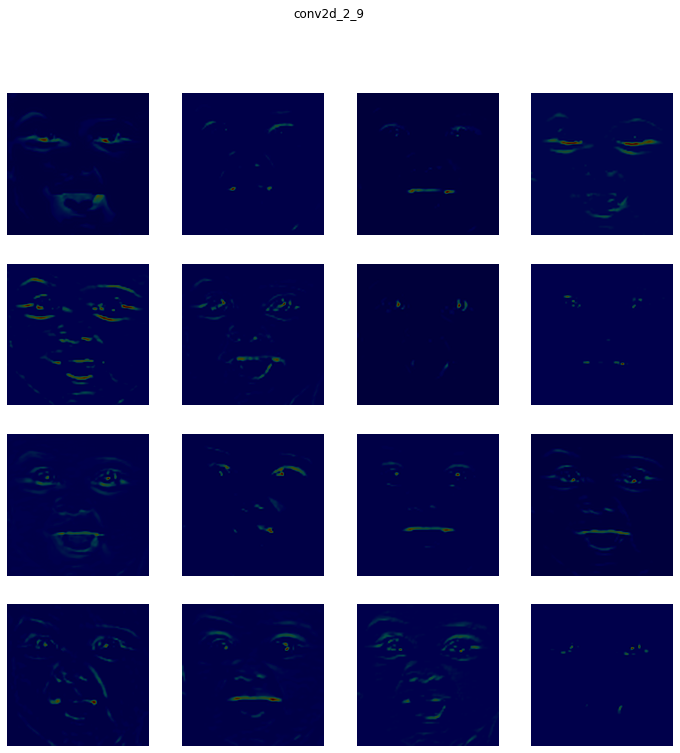

In [19]:
# Plot image activation
best_val_score = 'models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-weights-0.56.h5'
model_path     = 'models-and-results-UTKface_cropped-balanced/neural-network-2.0-lenet-5-proposed-model-model.h5'

plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg')

plot_layers(model_path         = model_path,
            best_val_score     = best_val_score,
            img_path           = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg',
            target_size_img    = (200, 200),
            color_mode_img     = 'rgb')

Predictions: [[0. 0. 0. 1. 0. 0. 0.]].


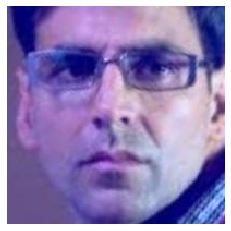

In [50]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\40\31_0_3_20170104230610969.jpg.chip.jpg')

Predictions: [[0. 0. 0. 0. 0. 1. 0.]].


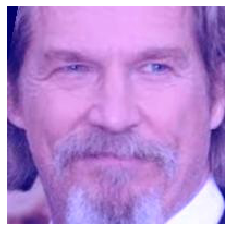

In [51]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\70\65_0_0_20170120222348112.jpg.chip.jpg')

Mean class accuracies:

Class 1-10 has an accuracy of 0.86.
Class 11-20 has an accuracy of 0.72.
Class 21-30 has an accuracy of 0.46.
Class 31-40 has an accuracy of 0.46.
Class 41-50 has an accuracy of 0.32.
Class 51-60 has an accuracy of 0.37.
Class 61-70 has an accuracy of 0.63.


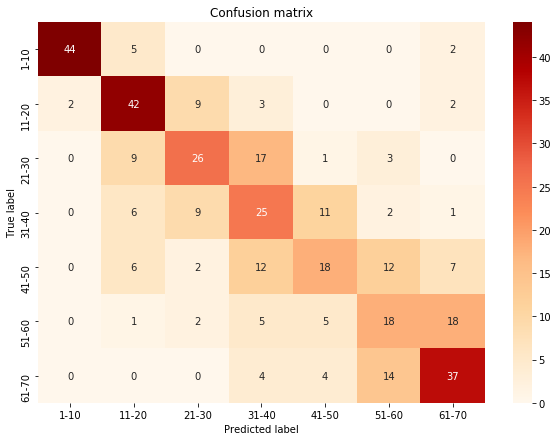

In [19]:
plot_confusion_matrix(model_path, best_val_score, test_generator)

------

<br><br><br><br>
# Neural Network 3.0 - Transfer Learning - VGG16

<br><br>
## Define/import the model

In [7]:
K.clear_session()

# Generate model without top layers
vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape=(200, 200, 3))

# Extract information of the last layer of VGG16
layer_dict = dict([(layer.name, layer) for layer in vgg16.layers])
x = layer_dict[vgg16.layers[-1].name].output

# Add layers
x = Flatten()(x)
x = Dense(512, activation='relu', name='fc1')(x)           # Change this to 512 instead of 4096
x = Dense(512, activation='relu', name='fc2')(x)           # Change this to 512 instead of 4096
x = Dense(7, activation='softmax', name='predictions')(x)  # Output layer

# Combine vgg16 layer with my own layers
model = Model(input = vgg16.input, output = x)

# Freeze everything EXCEPT the last 2 FC layers (of the 3)
for layer in model.layers[:-2]:
    layer.trainable = False
    
# Add compiler
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

# Name the model
model.name='neural-network-3.0-transfer-learning-vgg16'

# Show summary
model.summary()


Model: "neural-network-3.0-transfer-learning-vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling

C:\Users\Paulo\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`


<br><br>
## Generator

In [20]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (200, 200)
COLOR_MODE  = 'rgb'      # Model VVG16 expects rgb
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE,
                                                      shuffle      = False)

Found 6177 images belonging to 7 classes.
Found 1629 images belonging to 7 classes.
Found 384 images belonging to 7 classes.


<br><br><br>
## Run the model

In [10]:
filepath = "models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 15,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              callbacks           = callbacks_list,
                              workers             = (multiprocessing.cpu_count())
                             )

Epoch 1/15
193/193 [==============================] - 1609s 8s/step - loss: 1.6535 - accuracy: 0.3372 - val_loss: 1.3591 - val_accuracy: 0.4031

Epoch 00001: val_accuracy improved from -inf to 0.40312, saving model to models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-0.40.h5
Epoch 2/15
193/193 [==============================] - 1610s 8s/step - loss: 1.3951 - accuracy: 0.4286 - val_loss: 1.3245 - val_accuracy: 0.4652

Epoch 00002: val_accuracy improved from 0.40312 to 0.46525, saving model to models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-0.47.h5
Epoch 3/15
193/193 [==============================] - 1606s 8s/step - loss: 1.3249 - accuracy: 0.4581 - val_loss: 1.3997 - val_accuracy: 0.4734

Epoch 00003: val_accuracy improved from 0.46525 to 0.47339, saving model to models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-0.47.h5
Epoch 4/15
193/193 [===========

<br><br><br>
## Save results and plot results

In [11]:
# Save results
# model.save_weights('models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights.h5')
model.save('models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-model.h5')
save_history_model(history          = history,
                   filename         = 'neural-network-3.0-transfer-learning-vgg16-history', 
                   storage_location = 'models-and-results-UTKface_cropped-balanced')

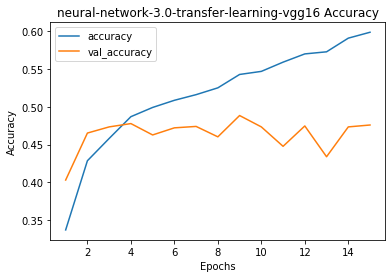

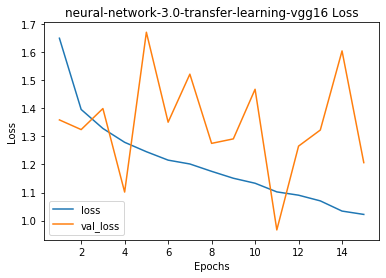

In [12]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'neural-network-3.0-transfer-learning-vgg16 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'neural-network-3.0-transfer-learning-vgg16 Loss')

Predictions: [[1.21923485e-29 9.99999881e-01 6.45033182e-08 7.41996543e-35
  0.00000000e+00 0.00000000e+00 0.00000000e+00]].
block5_conv3_3 (1, 12, 12, 512) 


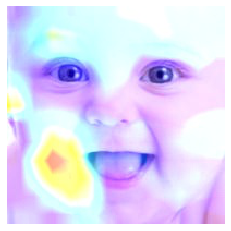

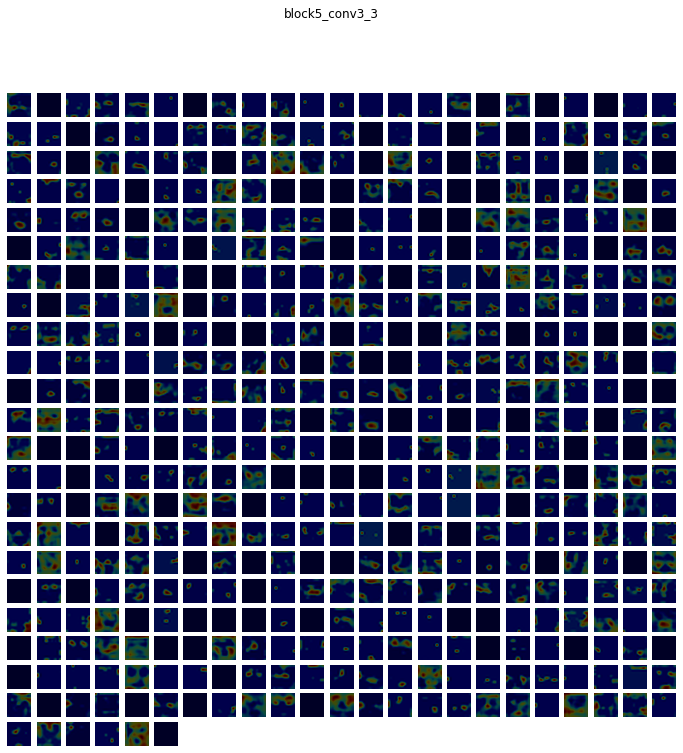

In [9]:
# Plot image activation
best_val_score = 'models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-0.49.h5'
model_path     = 'models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-model.h5'

plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg')

plot_layers(model_path         = model_path,
            best_val_score     = best_val_score,
            img_path           = r'datasets\UTKface_cropped-new-structure-balanced\test\10\1_0_0_20170110212624891.jpg.chip.jpg',
            target_size_img    = (200, 200),
            color_mode_img     = 'rgb')

Predictions: [[0.0000000e+00 1.0000000e+00 8.0646315e-19 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]].


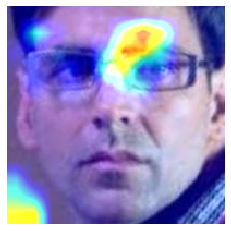

In [14]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\40\31_0_3_20170104230610969.jpg.chip.jpg')

Predictions: [[0.0000000e+00 1.0000000e+00 3.4323114e-31 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00]].


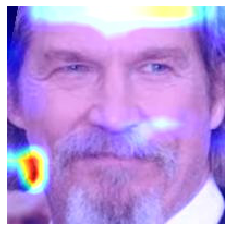

In [15]:
plot_image_activation(model_path   = model_path, 
                      weights_path = best_val_score, 
                      img_path     = r'datasets\UTKface_cropped-new-structure-balanced\test\70\65_0_0_20170120222348112.jpg.chip.jpg')

Mean class accuracies:

Class 1-10 has an accuracy of 0.76.
Class 11-20 has an accuracy of 0.52.
Class 21-30 has an accuracy of 0.48.
Class 31-40 has an accuracy of 0.26.
Class 41-50 has an accuracy of 0.28.
Class 51-60 has an accuracy of 0.37.
Class 61-70 has an accuracy of 0.56.


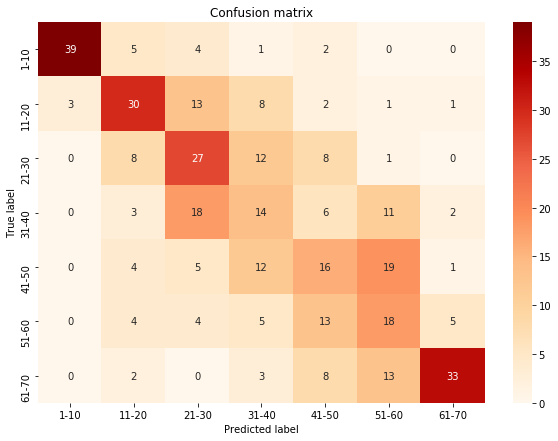

In [21]:
best_val_score = 'models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-weights-0.49.h5'
model_path     = 'models-and-results-UTKface_cropped-balanced/neural-network-3.0-transfer-learning-vgg16-model.h5'

plot_confusion_matrix(model_path, best_val_score, test_generator)